   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

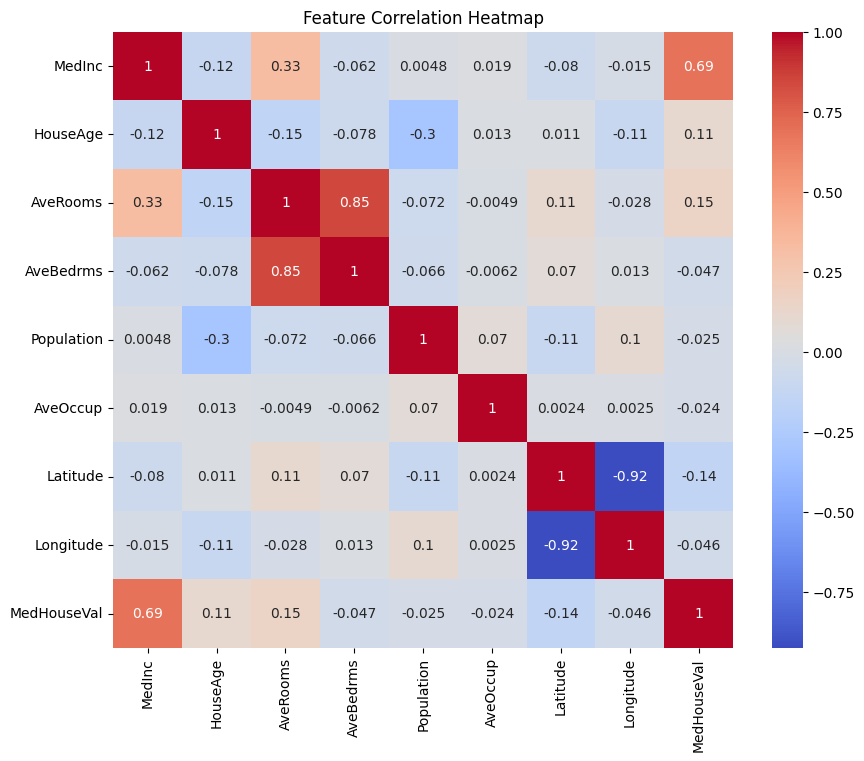

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Basic exploration
print(df.head())
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature matrix and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr:.3f}, R²: {r2_lr:.3f}")


Linear Regression - MSE: 0.556, R²: 0.576


In [5]:
from sklearn.neighbors import KNeighborsRegressor

# Train k-NN with default k=5 (you can tune this later)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"k-NN Regression - MSE: {mse_knn:.3f}, R²: {r2_knn:.3f}")


k-NN Regression - MSE: 0.432, R²: 0.670


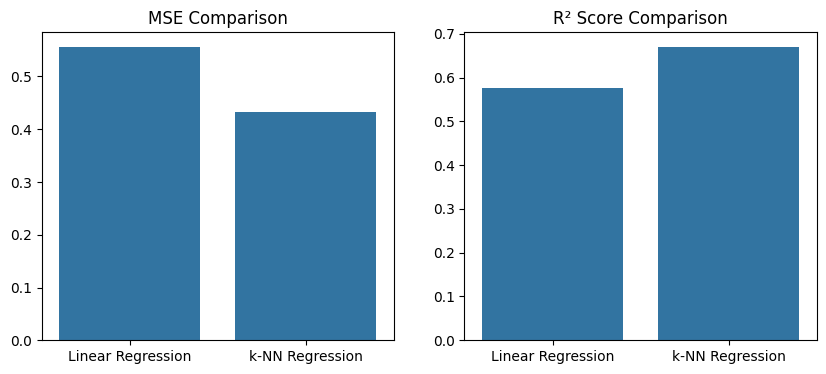

In [6]:
models = ['Linear Regression', 'k-NN Regression']
mses = [mse_lr, mse_knn]
r2s = [r2_lr, r2_knn]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=mses)
plt.title('MSE Comparison')

plt.subplot(1, 2, 2)
sns.barplot(x=models, y=r2s)
plt.title('R² Score Comparison')
plt.show()
